In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.qithubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-14 21:46:10--  https://raw.qithubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.qithubusercontent.com (raw.qithubusercontent.com)... failed: Name or service not known.
wget: unable to resolve host address ‘raw.qithubusercontent.com’


In [3]:
from google.colab import files
uploaded = files.upload()

Saving moore.csv to moore.csv


In [5]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
# Reshape X to be a 2D array of size N x 1 (D = 1) (keras expects this), rather than 1D array of size n
X = data[:,0].reshape(-1, 1)
# Y can stay as a 1D array
Y = data[:,1]

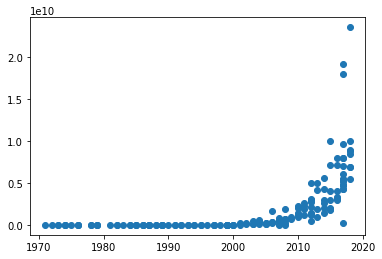

In [6]:
# Plot the data and see how it is exponential
plt.scatter(X, Y)

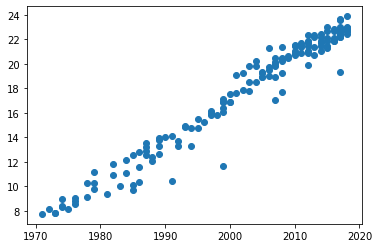

In [7]:
# Take the log because we want a linear model
Y = np.log(Y)
plt.scatter(X, Y)

In [8]:
# Preprocessing: lets center the X data (subtract the mean) so that values arent too large
# If we scaled it we'd have to reverse the transformation later (increase of 1 in X != increase in 1 year)
X = X - X.mean()

In [9]:
# Now create TensorFlow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

# Instead of 'adam' for the optimizer, we do an SGD (stochastic gradient descent) object: SGD(learning rate, momentum)
# This allows more control if we need it
# Learning rate is a hyperparameter, and the optimal LR is found through intution gained from practice and seeing many examples. Try powers of 10 for LR
# Look at loss per iteration (epoch) to see how your LR performs (though it still takes time to train the model)
model.compile(optimizer=tf.keras.optimizers.SGD(.001, .9), loss='mse')

# Learning rate scheduler
def schedule(epoch, learning_rate):
  if epoch >= 50:
    return .0001
  return .001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 576.9482 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 460.5686 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 343.0894 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 294.6688 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 189.5736 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 167.2460 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 141.9803 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 132.9181 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 67.4587 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 52.6606 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss:

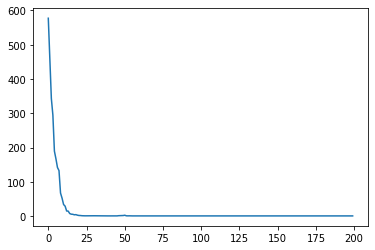

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [13]:
# The slope of the line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights())
# The input layer doesnt count (so its just the Dense layer)
# First array is W, second array is b
# W is a 2D array and b is a 1D array...this is because this is a more general version of the dense layer (we can have multiple outputs)
# W.shape should be (D,M) and b.shape should be (M,) (D = input size, M = output size)

[array([[0.3433327]], dtype=float32), array([17.773361], dtype=float32)]


In [14]:
# Slope of the line is
a = model.layers[0].get_weights()[0][0,0]

0.3433327

*When you get access to his code, fill in this section with his text explanation

In [16]:
time_to_double = np.log(2) / a
time_to_double

2.0188789609824167

# Part 2: making predictions

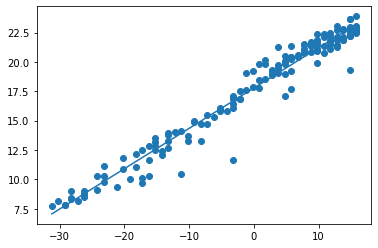

In [18]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)
# as expected, the line passes through the data points (confirming Moore's law is true)

In [19]:
# Manual calculation
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1), so flatten
Yhat2 = (X.dot(w) + b).flatten()

# floating points always have round off errors, so dont use ==
# numpy has the allclose function which tells us if theyre equal
np.allclose(Yhat, Yhat2)

True